<a href="https://colab.research.google.com/github/sharanya-sharma/Image-Processing/blob/main/PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

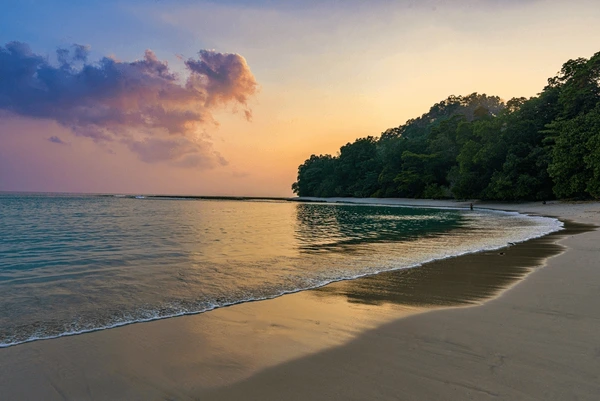

In [ ]:
# Load the image
image = cv2.imread('input.jpg')

if image is None:
    print("Error: Image file not found or invalid format!")
else:
    cv2_imshow(image)

1. Image Enhancement operations

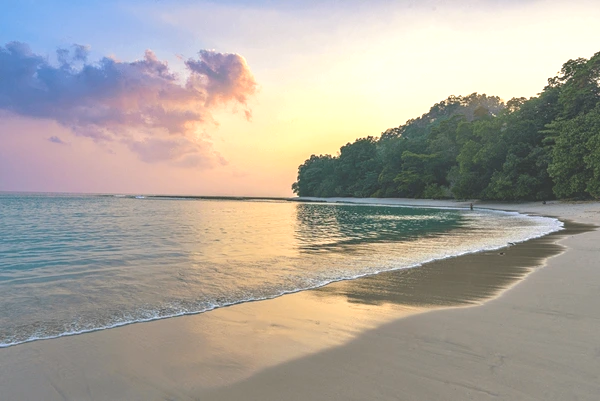

In [ ]:
# 1. Brightness Adjustment
def adjust_brightness(image, value):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)  # beta controls brightness

bright_image = adjust_brightness(image, 50)
cv2_imshow(bright_image)

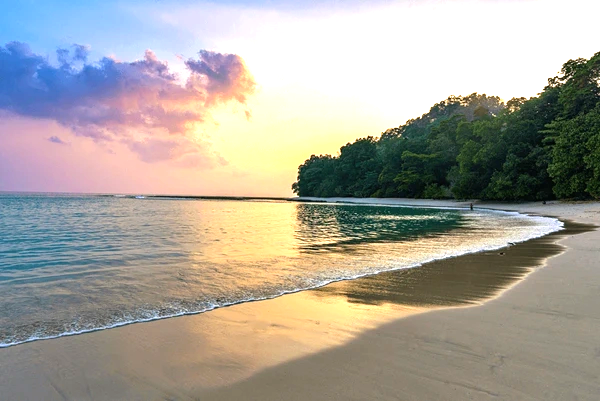

In [ ]:
# 2. Contrast Adjustment
def adjust_contrast(image, alpha):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=0)  # alpha >1 increases contrast

contrast_image = adjust_contrast(image, 1.5)
cv2_imshow(contrast_image)

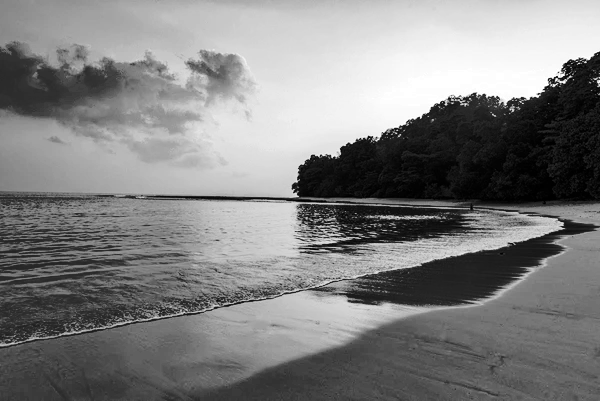

In [ ]:
# 3. Histogram Equalization (for Grayscale)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray)
cv2_imshow(equalized_image)

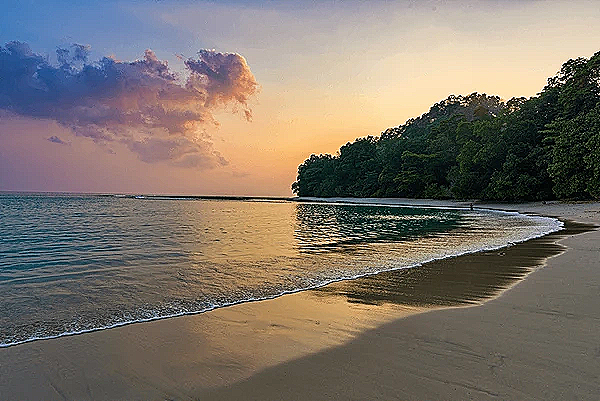

In [ ]:
# 4. Sharpening (Enhancing edges)
kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(sharpened_image)

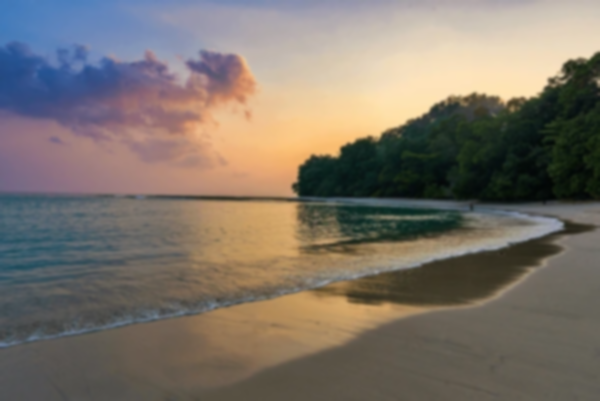

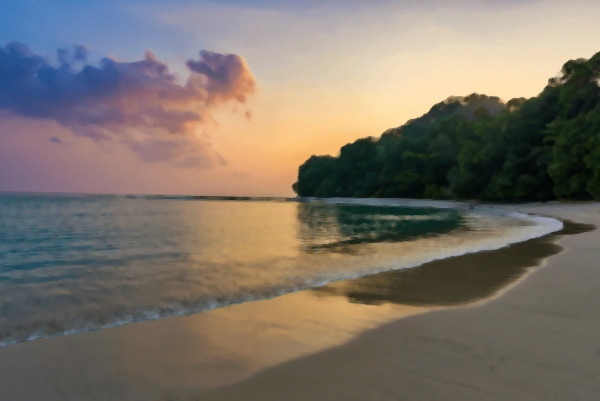

In [ ]:
# 5. Smoothing/Blurring
gaussian_blur = cv2.GaussianBlur(image, (7, 7), 0)  # Gaussian Blur
cv2_imshow(gaussian_blur)  # ✅ Corrected

median_blur = cv2.medianBlur(image, 5)  # Median Blur
cv2_imshow(median_blur)

2. Geometric Transformations

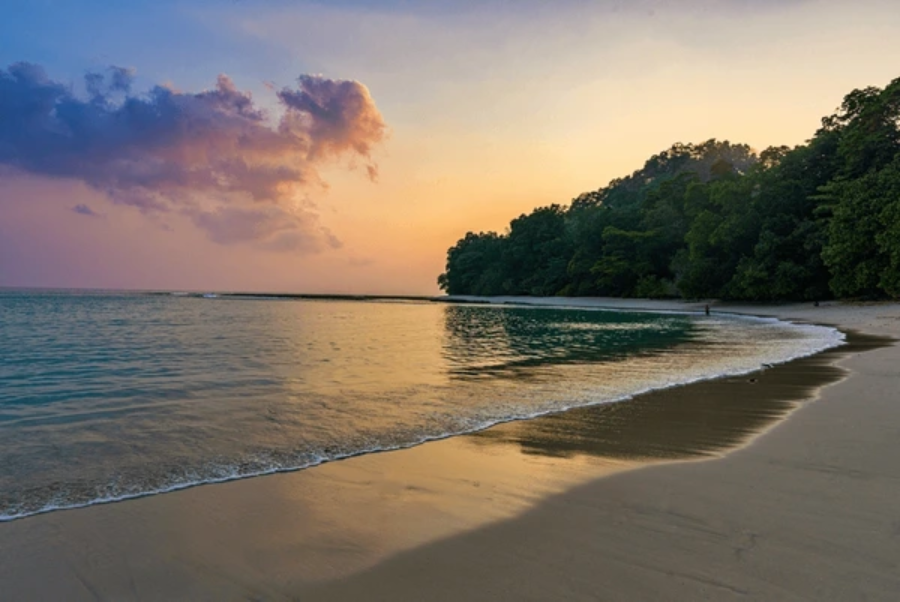

In [ ]:
 # 1. Scaling (Resizing)
def scale_image(image, scale_x, scale_y):
    return cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

scaled_image = scale_image(image, 1.5, 1.5)  # Increase size by 1.5x
cv2_imshow(scaled_image)

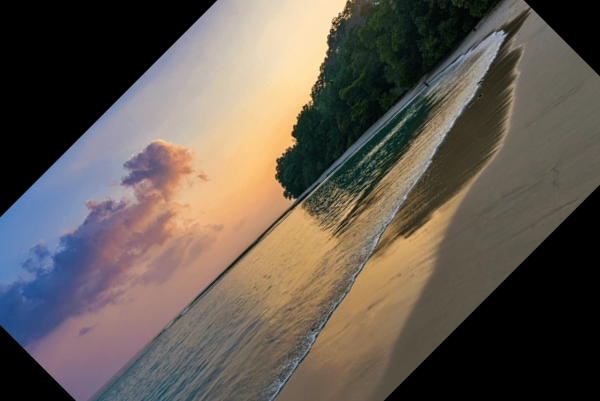

In [ ]:
# 2. Rotation
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)  # Rotation matrix
    return cv2.warpAffine(image, M, (w, h))

rotated_image = rotate_image(image, 45)  # Rotate by 45 degrees
cv2_imshow(rotated_image)

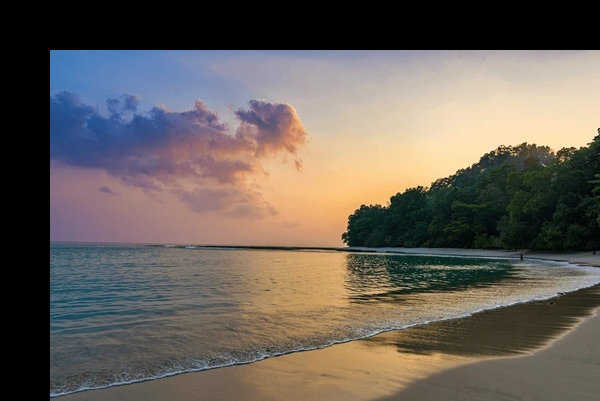

In [ ]:
# 3. Translation (Moving the image)
def translate_image(image, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])  # Translation matrix
    return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

translated_image = translate_image(image, 50, 50)  # Move right and down
cv2_imshow(translated_image)

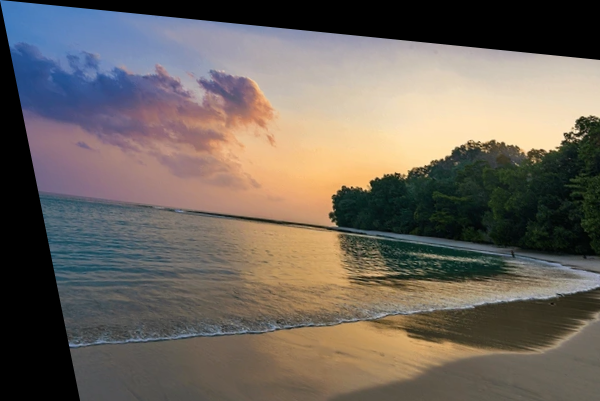

In [ ]:
# 4. Shearing (Slanting the image)
def shear_image(image, shear_x, shear_y):
    (h, w) = image.shape[:2]
    M = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])  # Shear matrix
    return cv2.warpAffine(image, M, (w, h))

sheared_image = shear_image(image, 0.2, 0.1)  # Shear horizontally and vertically
cv2_imshow(sheared_image)

3. Color and Intensity Transformations

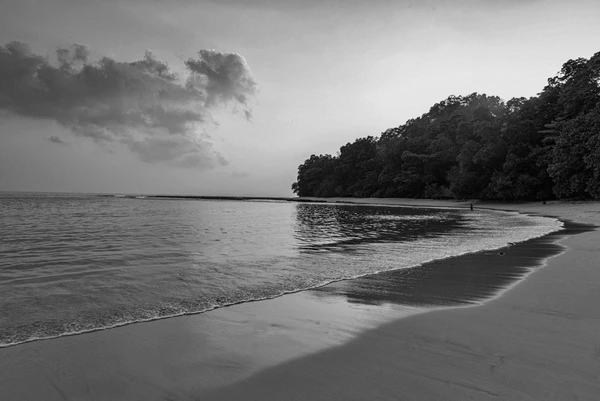

In [ ]:
# 1. Grayscale Conversion
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

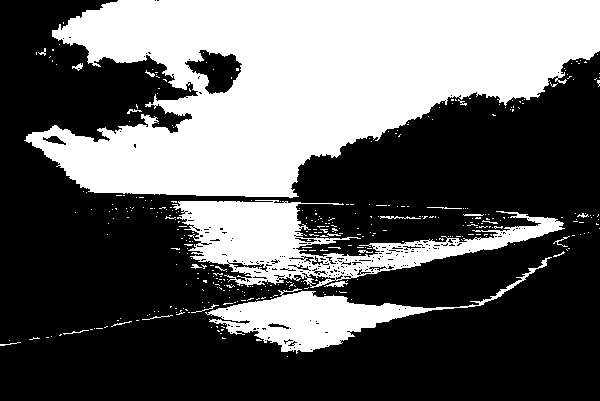

In [33]:
# 2. Binarization (Thresholding)
def threshold_image(image, threshold=127):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

binary_image = threshold_image(gray_image, 127)
cv2_imshow(binary_image)

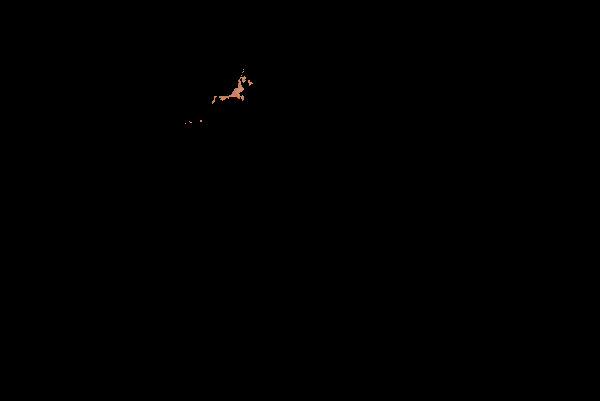

In [34]:
# 3. Color Filtering (Isolating Red Color)
def filter_color(image, lower, upper):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV
    mask = cv2.inRange(hsv, lower, upper)  # Apply mask
    return cv2.bitwise_and(image, image, mask=mask)

lower_red = np.array([0, 120, 70])  # Lower HSV range for red
upper_red = np.array([10, 255, 255])  # Upper HSV range for red
red_filtered_image = filter_color(image, lower_red, upper_red)
cv2_imshow(red_filtered_image)

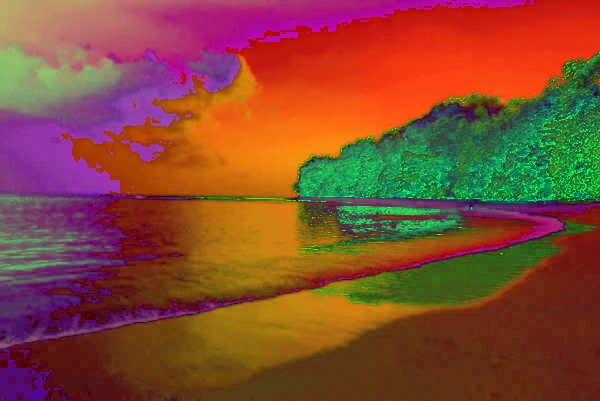

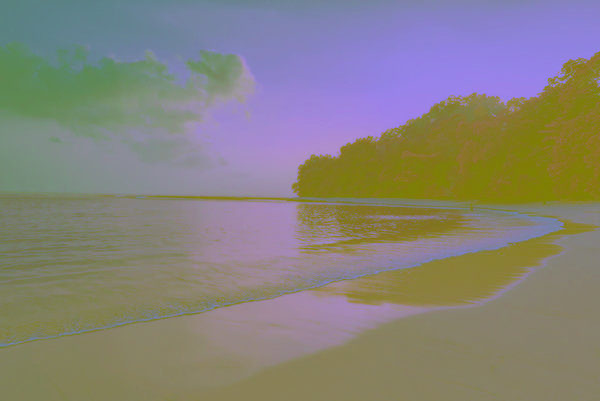

In [35]:
# 4. Color Space Conversion (RGB to HSV)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image)

# Convert RGB to LAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2_imshow(lab_image)

4. Image Filtering and Noise Reduction

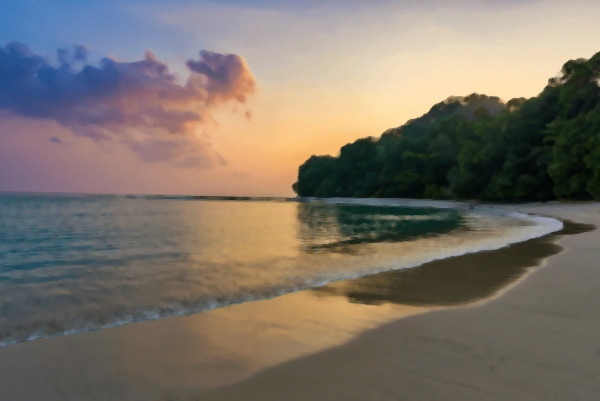

In [36]:
# 1. Median Filtering (Removes salt-and-pepper noise)
median_filtered = cv2.medianBlur(image, 5)  # Kernel size = 5
cv2_imshow(median_filtered)

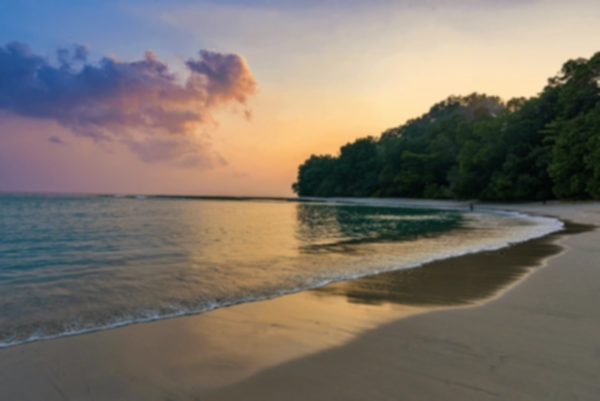

In [37]:
# 2. Gaussian Filtering (Blurring to remove Gaussian noise)
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)  # 5x5 kernel
cv2_imshow(gaussian_filtered)

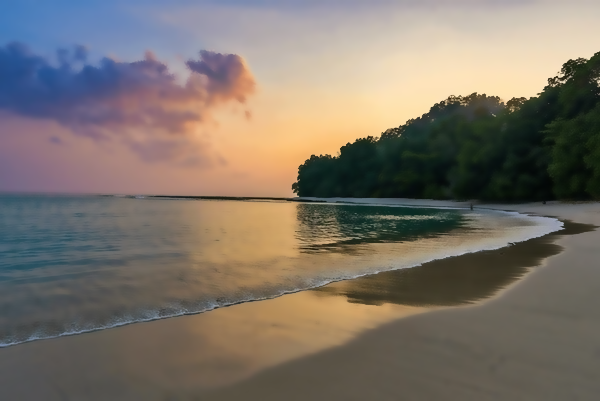

In [38]:
# 3. Bilateral Filtering (Reduces noise while preserving edges)
bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)  # d=9, σColor=75, σSpace=75
cv2_imshow(bilateral_filtered)